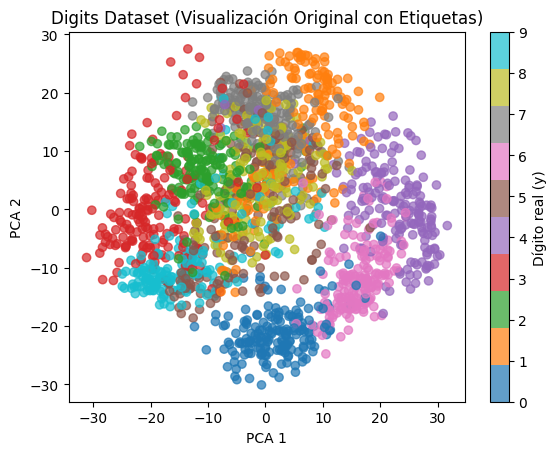

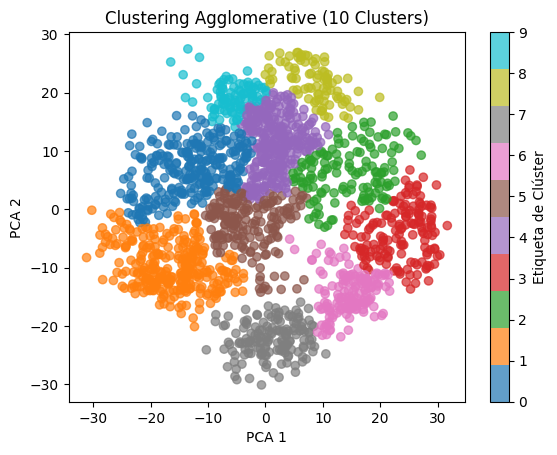

In [7]:
# Importar librerías necesarias
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset real: imágenes de dígitos (0 a 9)
digits = load_digits()
X = digits.data       # Datos de imagen (64 características)
y = digits.target     # Etiquetas reales (no se usarán para clustering, pero sí para comparar)

# Reducir a 2 dimensiones con PCA para poder visualizar
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Visualización original con colores reales (etiquetas reales)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title('Digits Dataset (Visualización Original con Etiquetas)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Dígito real (y)")
plt.show()

# 🧠 ¿Qué hace esto?
# Esta parte usa PCA para proyectar las imágenes (de 64 dimensiones) a solo 2 dimensiones,
# lo que nos permite ver cómo se distribuyen los dígitos. El color representa la clase real (0 al 9).

# -----------------------------------------
# 🧠 Clustering con AgglomerativeClustering
# -----------------------------------------

# Instanciar modelo jerárquico (agrupamiento aglomerativo)
model_agglo = AgglomerativeClustering(n_clusters=10)  # 10 clusters porque hay 10 dígitos

# Ajustar el modelo
model_agglo.fit(X_2D)

# Visualización de los clusters encontrados por el modelo
my_colors = plt.cm.tab10.colors  # 10 colores distintos
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=model_agglo.labels_, cmap='tab10', alpha=0.7)
plt.title('Clustering Agglomerative (10 Clusters)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Etiqueta de Clúster")
plt.show()


Computing embedding
Done.
ward :	0.12s
average :	0.08s
complete :	0.07s
single :	0.03s


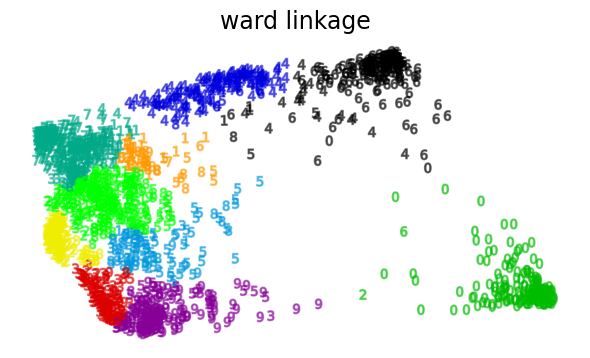

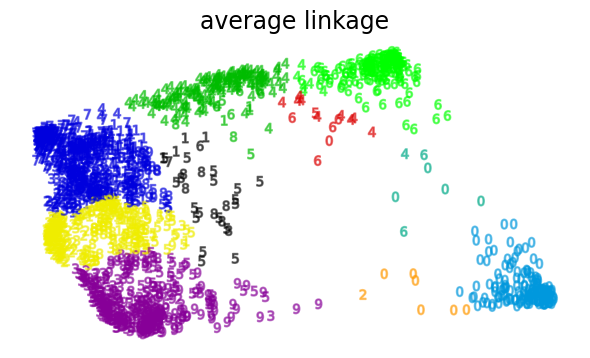

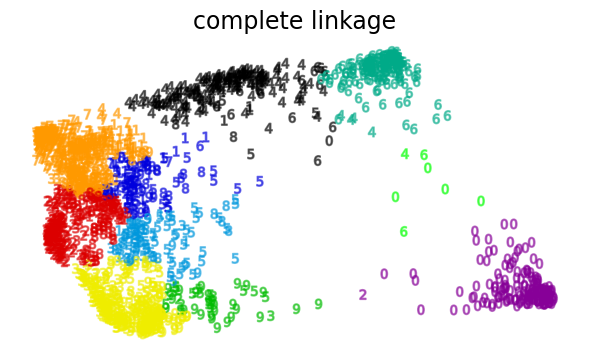

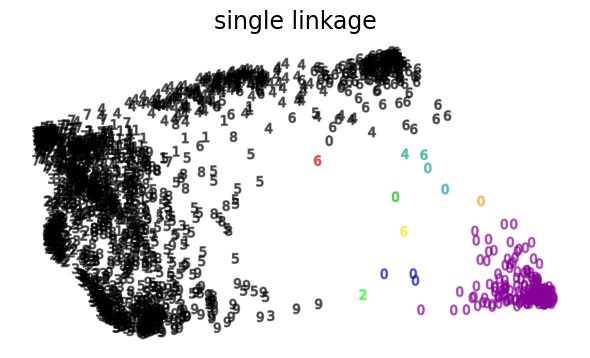

In [8]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, manifold

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)


# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

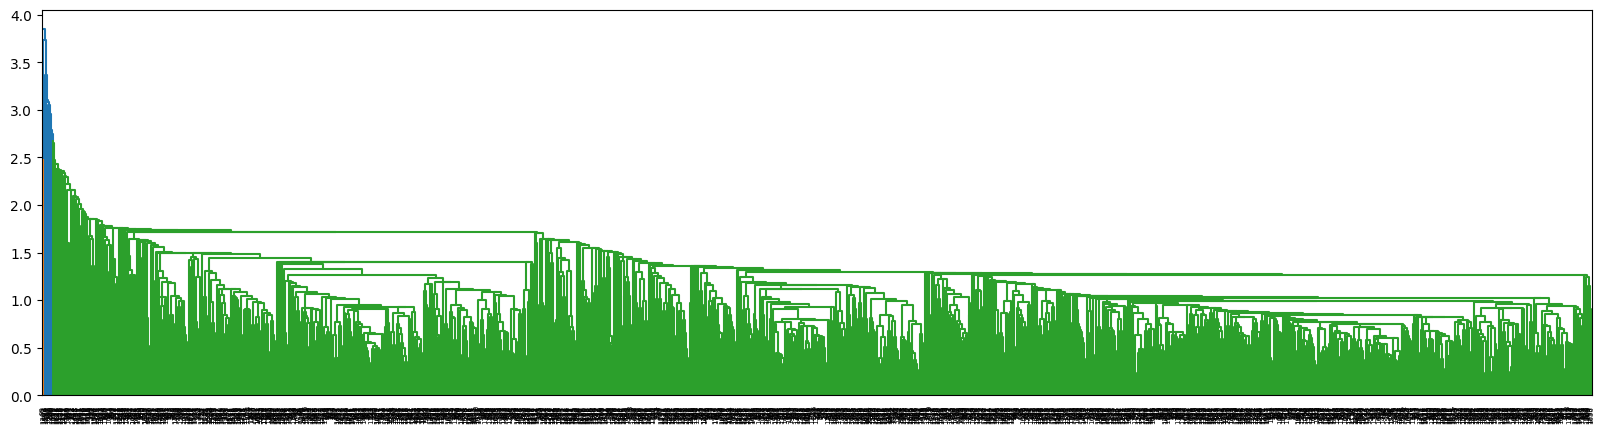

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

myLinkage = linkage(X_2D, method="single")
plt.figure(figsize=(20, 5))
dendrogram(myLinkage)
plt.show()

In [10]:
labels = fcluster(myLinkage, 1.5, criterion='distance')
pd.Series(labels).value_counts()

,count
62,1133
43,438
54,22
35,11
57,11
...,...
97,1
86,1
84,1
9,1
